# Boom Bikes Rental Analysis

### Objective
A  Bike rental company has shared their data for analysis of teh factors which can help them in thier business after the COVID pandemic. And we need to provide them significant variables predicting the demand for shared bikes.

### Business Goal:
The goal is to build a mode that can predict the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. 

### Building Multiple Linear Regression Model


#### Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the bike rental dataset

In [846]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [847]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [848]:
#read the data
rental  = pd.read_csv('day.csv')

In [849]:
#structural analysis
rental.shape

(730, 16)

In [850]:
rental.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Looking at the data, we can an analyse that, season, year mnth,holiday,weekday,workingday etc are categorical variables and temp,atemp,windspeed,hum are numerical variables

In [851]:
#descibing the columns and the details of the dataset
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


With this info, we can determine that there are no null values present in this data set and it has 730 rows and 16 columns

Analyzing the data further and applying the domain knowledge and the business problem , we can determine that the instant(index), dteday,casual and registered these columns are not relevamt in our case for prediction.SO we can drop them

And, the cnt varibale is our target variable

In [852]:
#dropping the irrelevant variables
rental.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
rental.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [853]:
#checking the statistics the dataset states
rental.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


### Exploratory Data Analysis
Data Analysis- Univariate analysis


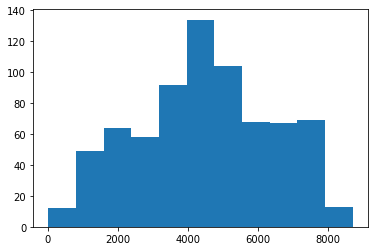

In [854]:
plt.hist(rental['cnt'],bins=11)
plt.show()

From, the above distibution of our target variable,we can determine that the cnt variable is distributed normally and having the maximum frequency around the center ~ mean 4500

Similarly, we can also analyze other varibales with our target variables


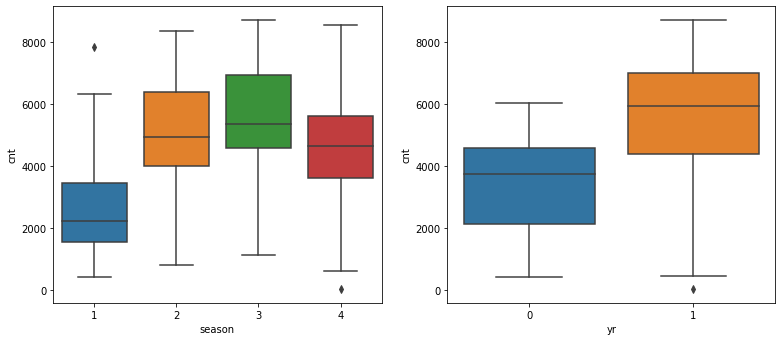

In [855]:
#Categorical Variables analysis
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = rental)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = rental)

plt.show()

Major inferences from the above visulaizations
1. The spring season marks the lowest demand of bikes
2. The fall season records the highest demand of bikes
3. The highest demand of bikes was in year 2019

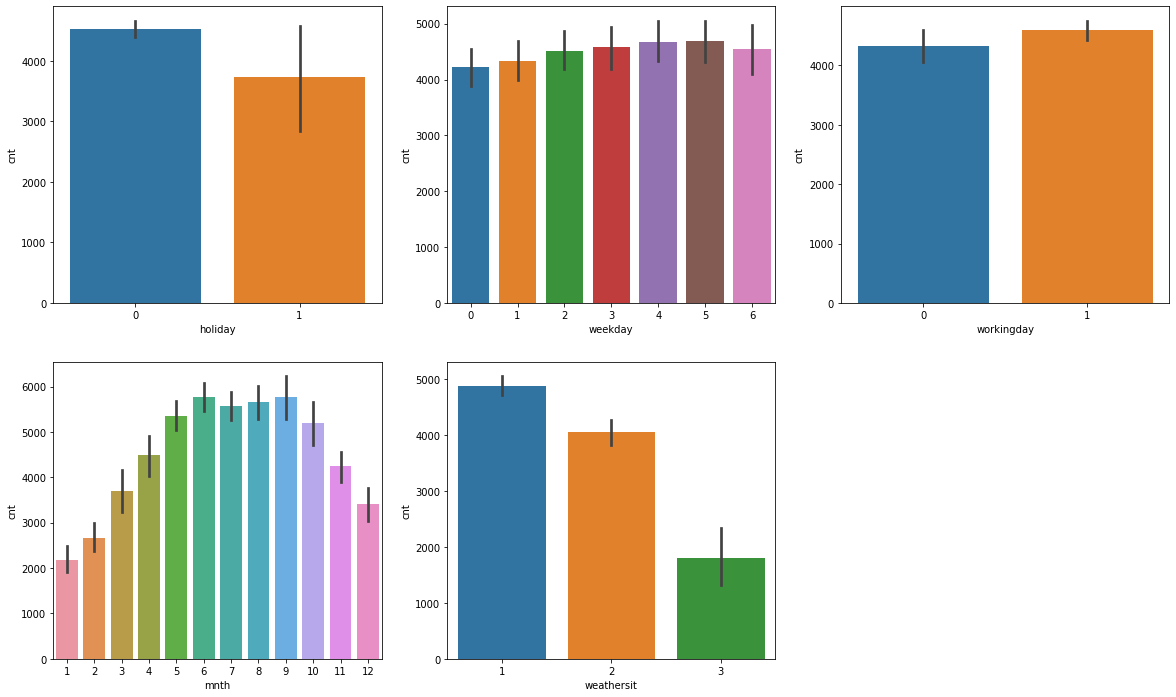

In [856]:
#Analyzing holiday, weekday and workingday for the bike demands
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.barplot(x = 'holiday', y = 'cnt', data = rental)
plt.subplot(2,3,2)
sns.barplot(x = 'weekday', y = 'cnt', data = rental)
plt.subplot(2,3,3)
sns.barplot(x = 'workingday', y = 'cnt', data = rental)
plt.subplot(2,3,4)
sns.barplot(x = 'mnth', y = 'cnt', data = rental)
plt.subplot(2,3,5)
sns.barplot(x = 'weathersit', y = 'cnt', data = rental)

From the above, the major inference, we can draw is that
- most bikes were rented when there was no holiday(maybe rented for work commute) and 
- most rentals as per the season were in the months of summer and fall
- The demand was high for the clear weather

#### Multivariate Analysis

<Figure size 2880x1440 with 0 Axes>

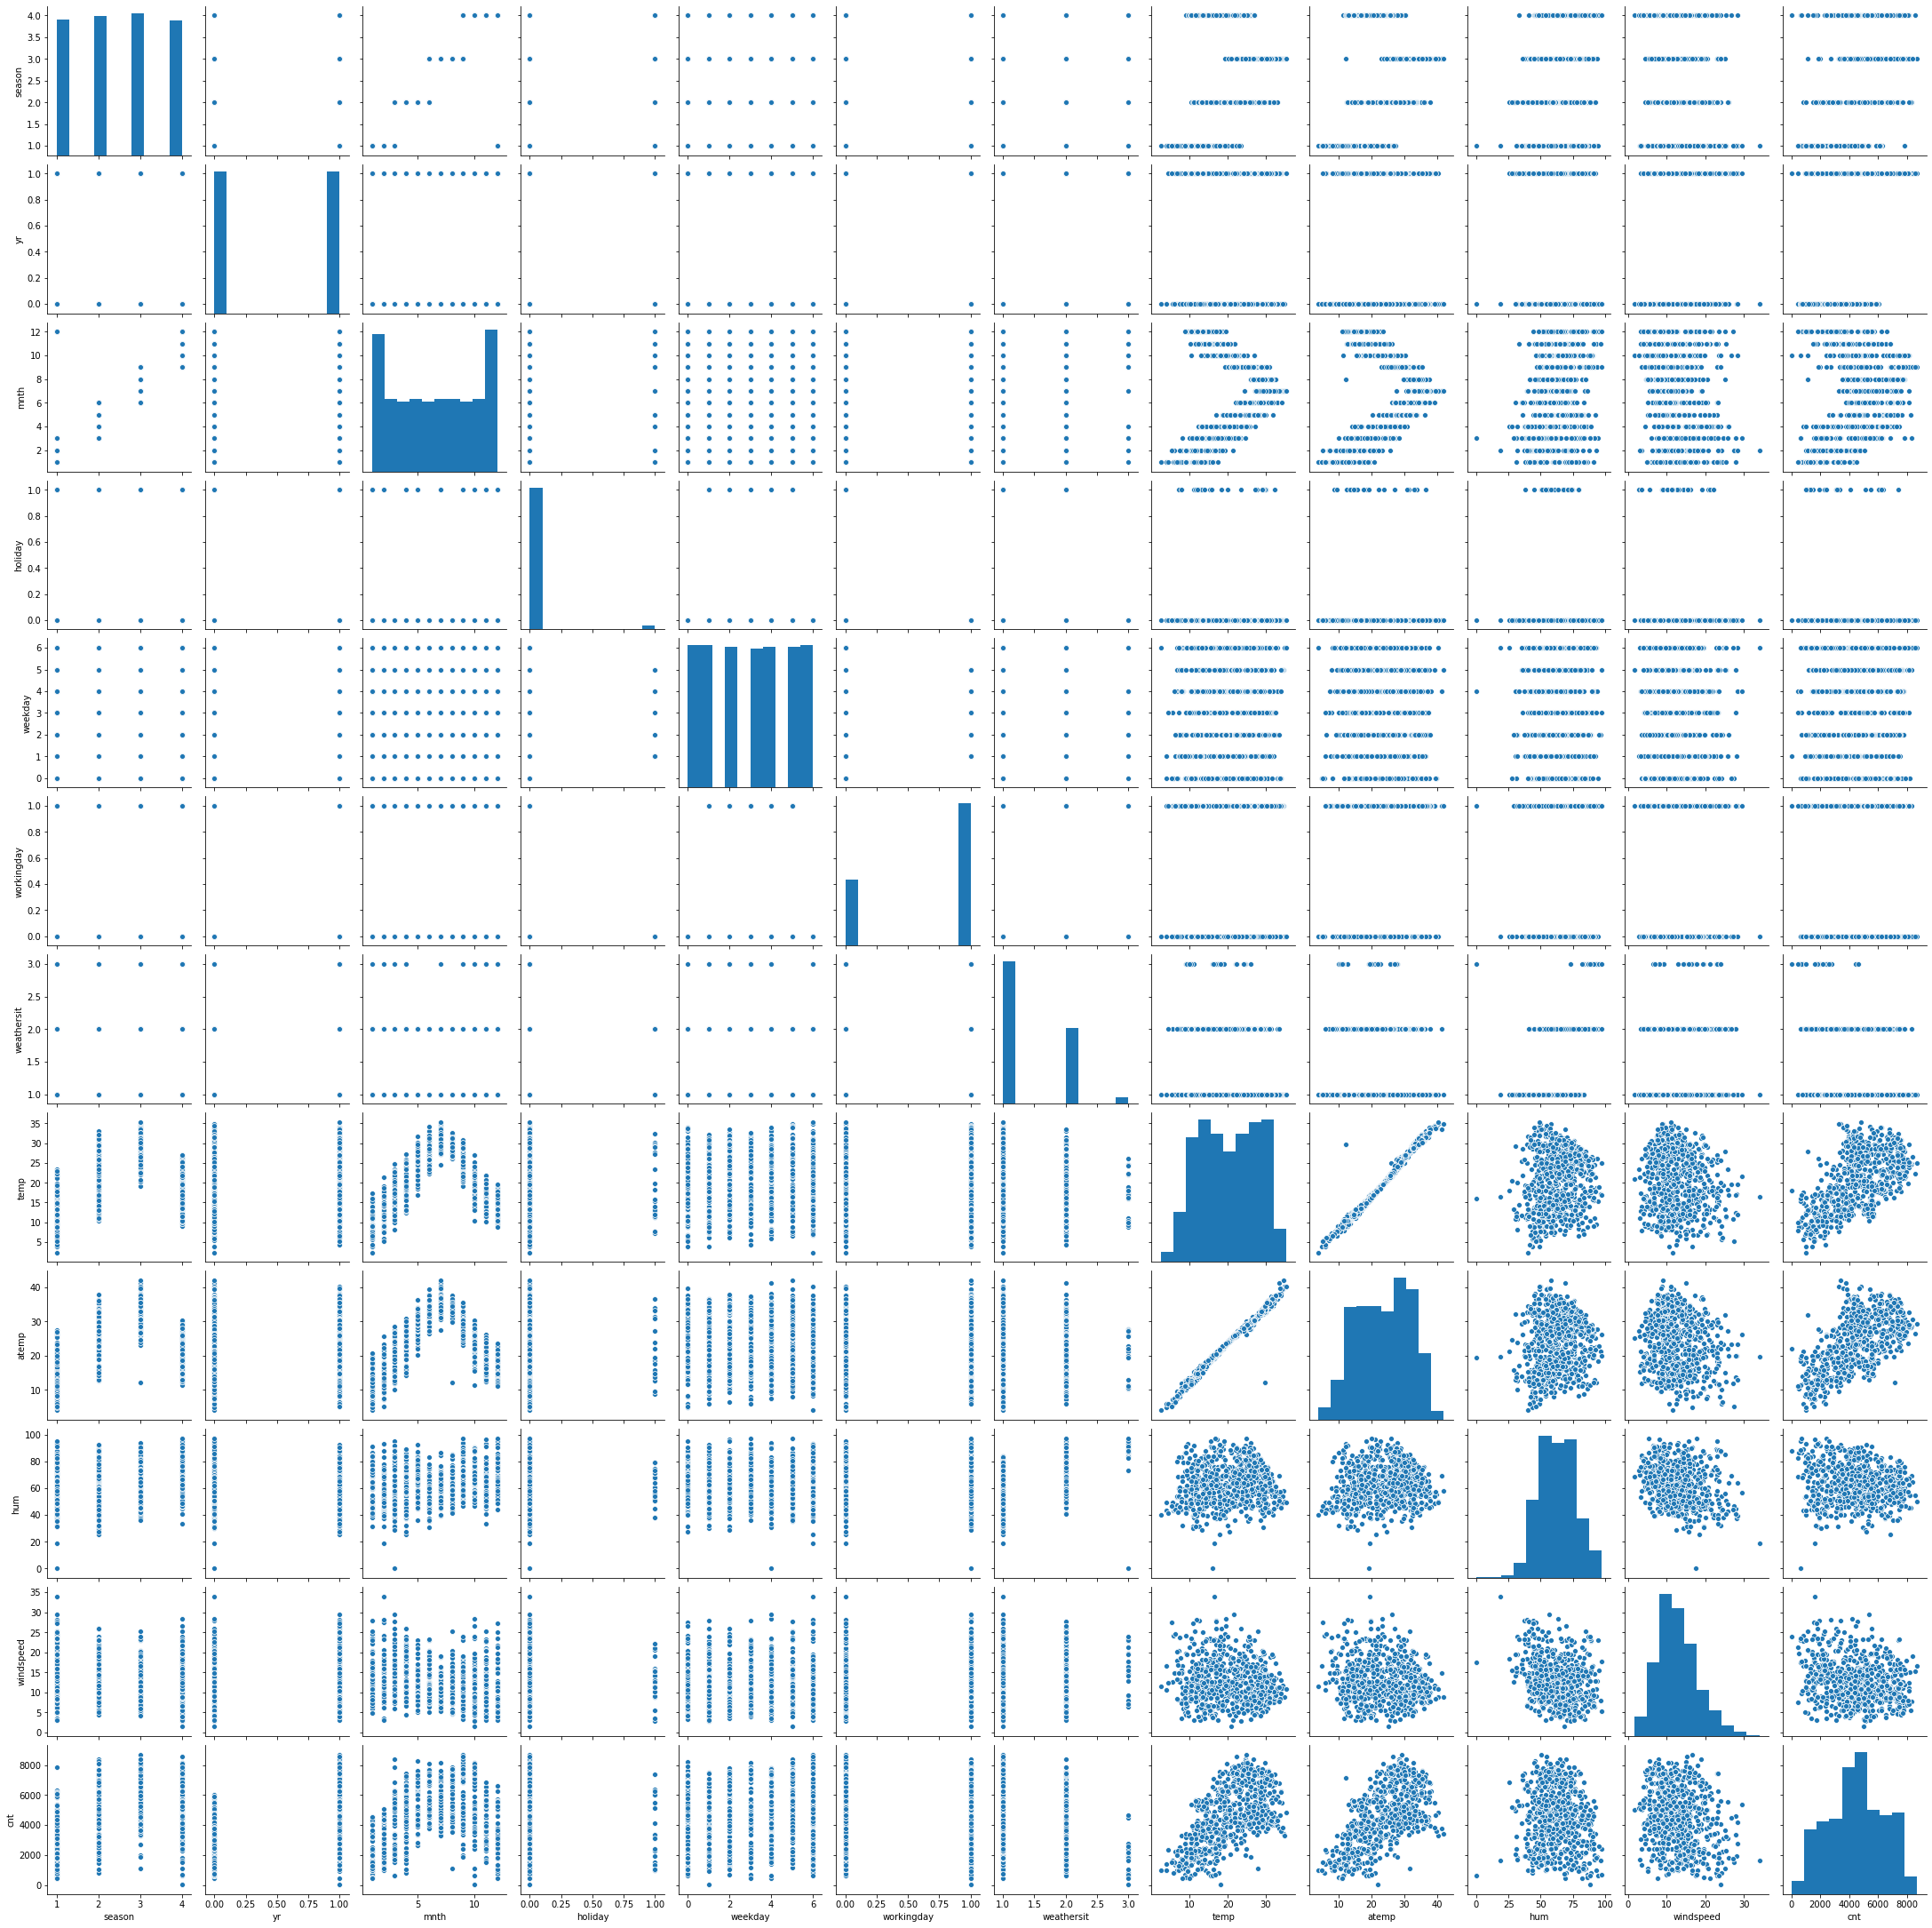

In [857]:
#Pairplot of all variables of dataset
plt.figure(figsize=(40, 20))
sns.pairplot(rental)
plt.show()

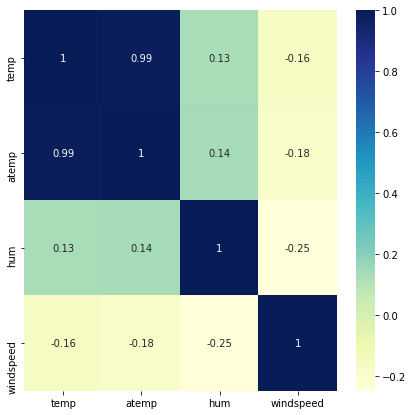

In [791]:
plt.figure(figsize=(7,7))
cont_var= ['temp', 'atemp', 'hum',
       'windspeed']
#corr = master[cont_var].corr()
sns.heatmap(rental[cont_var].corr(), annot = True, cmap="YlGnBu")

Since, there is very high corelation between atemp and temp(these values being highly inter-related) so, to avoid redundancy we can drop atemp

In [792]:
#dropping atemp
rental.drop(['atemp'],axis=1,inplace=True)
rental.shape

(730, 11)

In [793]:
rental.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801


#### Adding dummy Variables and performing the Encodings on categorical variables

In [794]:
rental.info()
rental['weekday'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

In [795]:
#changinf the type of categoircal variables to get the dummy variables
rental['season']= rental['season'].astype('category')
rental['mnth']= rental['mnth'].astype('category')
rental['weathersit']= rental['weathersit'].astype('category')
rental['weekday']= rental['weekday'].astype('category')

In [796]:
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(4), float64(3), int64(4)
memory usage: 44.0 KB


In [797]:
rental = pd.get_dummies(rental,drop_first=True)
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   hum           730 non-null    float64
 5   windspeed     730 non-null    float64
 6   cnt           730 non-null    int64  
 7   season_2      730 non-null    uint8  
 8   season_3      730 non-null    uint8  
 9   season_4      730 non-null    uint8  
 10  mnth_2        730 non-null    uint8  
 11  mnth_3        730 non-null    uint8  
 12  mnth_4        730 non-null    uint8  
 13  mnth_5        730 non-null    uint8  
 14  mnth_6        730 non-null    uint8  
 15  mnth_7        730 non-null    uint8  
 16  mnth_8        730 non-null    uint8  
 17  mnth_9        730 non-null    uint8  
 18  mnth_10       730 non-null    

#### Splitting the Data into Training and Testing Sets
The first basic step for regression is performing a train-test split.

In [798]:
# We write this so that the train and test data set always have the same rows
np.random.seed(0)
df_train, df_test = train_test_split(rental, train_size = 0.7, random_state = 100)

#### Rescaling the Features 

We will use MinMax scaling.

In [799]:
scale = MinMaxScaler()

In [800]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
numeric_df = ['cnt', 'temp', 'hum','windspeed']

df_train[numeric_df] = scale.fit_transform(df_train[numeric_df])

df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,1,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,1,0,0,...,0,0,0,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.751824,0.380981,0.191095,1,0,0,...,0,0,0,0,0,0,1,0,1,0


### Dividing the train set into target and predictors(X and Y)

In [801]:
y_train = df_train.pop('cnt')
X_train = df_train

### Building our model

### RFE

In [802]:
# Running RFE 
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)            
rfe = rfe.fit(X_train, y_train)

In [803]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 6),
 ('season_4', True, 1),
 ('mnth_2', False, 11),
 ('mnth_3', False, 7),
 ('mnth_4', False, 9),
 ('mnth_5', False, 8),
 ('mnth_6', False, 10),
 ('mnth_7', False, 12),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', False, 5),
 ('mnth_11', False, 13),
 ('mnth_12', False, 14),
 ('weekday_1', False, 15),
 ('weekday_2', False, 16),
 ('weekday_3', False, 18),
 ('weekday_4', False, 19),
 ('weekday_5', False, 17),
 ('weekday_6', False, 3),
 ('weathersit_2', False, 2),
 ('weathersit_3', True, 1)]

In [804]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_4',
       'mnth_8', 'mnth_9', 'weathersit_3'],
      dtype='object')

In [805]:
X_train.columns[~rfe.support_]

Index(['workingday', 'season_3', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_7', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weathersit_2'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics


In [806]:
X_train_rfe = X_train[col] #with rfe columns

In [807]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [808]:
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [845]:
y_train_pred= lm_2.predict(X_train_lm)

ValueError: shapes (510,9) and (10,) not aligned: 9 (dim 1) != 10 (dim 0)

ValueError: x and y must be the same size

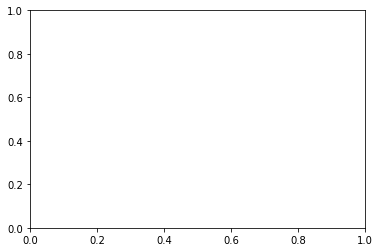

In [844]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.127 + 0.462*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [810]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.8
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          1.02e-186
Time:                        21:17:56   Log-Likelihood:                 495.21
No. Observations:                 510   AIC:                            -968.4
Df Residuals:                     499   BIC:                            -921.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2755      0.026     10.547   

In [811]:
lm.params

const           0.275494
yr              0.226440
holiday        -0.089328
temp            0.565977
hum            -0.284796
windspeed      -0.201244
season_2        0.101143
season_4        0.150802
mnth_8          0.049552
mnth_9          0.118991
weathersit_3   -0.191561
dtype: float64

In [812]:
X_train_rfe.drop(['const'],axis=1,inplace=True)

In [813]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,10.02
2,temp,8.52
4,windspeed,3.57
0,yr,2.01
5,season_2,1.82
6,season_4,1.73
7,mnth_8,1.57
8,mnth_9,1.30
9,weathersit_3,1.09
1,holiday,1.04


In [814]:
X_train_new = X_train_rfe.drop(['hum'],axis=1)

In [815]:
X_train_new.head()

,yr,holiday,temp,windspeed,season_2,season_4,mnth_8,mnth_9,weathersit_3
576,1,0,0.815169,0.264686,0,0,0,0,0
426,1,0,0.442393,0.255342,0,0,0,0,0
728,1,0,0.245101,0.663106,0,0,0,0,0
482,1,0,0.395666,0.188475,1,0,0,0,0
111,0,0,0.345824,0.380981,1,0,0,0,0


In [816]:
X_train_lm = sm.add_constant(X_train_new)

In [817]:
lm_2 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [837]:
#Let's see the summary of our linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     230.3
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          1.39e-171
Time:                        21:30:20   Log-Likelihood:                 456.65
No. Observations:                 510   AIC:                            -893.3
Df Residuals:                     500   BIC:                            -851.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0900      0.017      5.181   

In [838]:
lm_2.params

const           0.090030
yr              0.233233
holiday        -0.084826
temp            0.546436
windspeed      -0.142707
season_2        0.090521
season_4        0.131612
mnth_8          0.039352
mnth_9          0.100173
weathersit_3   -0.251998
dtype: float64

In [839]:
X_train_lm.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_2', 'season_4', 'mnth_8',
       'mnth_9', 'weathersit_3'],
      dtype='object')

In [840]:
X_train_lm.drop(['const'],axis=1,inplace=True)

KeyError: "['const'] not found in axis"

In [841]:
vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.99
3,windspeed,3.01
0,yr,2.00
4,season_2,1.79
6,mnth_8,1.57
5,season_4,1.44
7,mnth_9,1.29
8,weathersit_3,1.06
1,holiday,1.04


In [842]:
X_train_lm.shape

(510, 9)

## Residual Analysis of the train data

In [843]:
y_train_pred= lm_2.predict(X_train_lm)

ValueError: shapes (510,9) and (10,) not aligned: 9 (dim 1) != 10 (dim 0)

Text(0.5, 0, 'Errors')

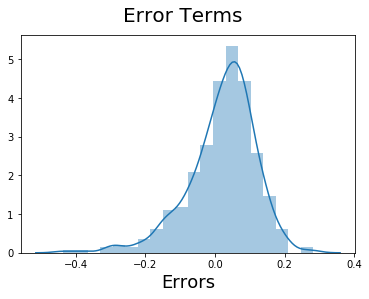

In [826]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

#### Making Predictions

#### Applying the scaling on the test sets

In [827]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
numeric_df = ['cnt', 'temp','windspeed','hum']

df_test[numeric_df] = scale.fit_transform(df_test[numeric_df])

df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,0.837241,0.534223,0.149393,0.704300,0,1,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.911423,0.470417,0.231142,0.725421,1,0,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.496221,0.777843,0.443398,0.278853,0,0,1,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.890387,0.236659,0.449707,0.545512,0,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.821739,0.070765,0.682387,0.569148,1,0,0,...,0,0,0,0,0,1,0,0,0,0


#### Dividing into X_test and y_test

In [828]:
y_test = df_test.pop('cnt')
X_test = df_test

In [829]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_lm.columns]

# Adding a constant variable 
X_test_lm = sm.add_constant(X_test_new)
X_test_lm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         220 non-null    float64
 1   yr            220 non-null    int64  
 2   holiday       220 non-null    int64  
 3   temp          220 non-null    float64
 4   windspeed     220 non-null    float64
 5   season_2      220 non-null    uint8  
 6   season_4      220 non-null    uint8  
 7   mnth_8        220 non-null    uint8  
 8   mnth_9        220 non-null    uint8  
 9   weathersit_3  220 non-null    uint8  
dtypes: float64(3), int64(2), uint8(5)
memory usage: 11.4 KB


In [830]:
# Making predictions
y_test_pred = lm_2.predict(X_test_lm)

#### Model Evaluation

Text(0, 0.5, 'y_pred')

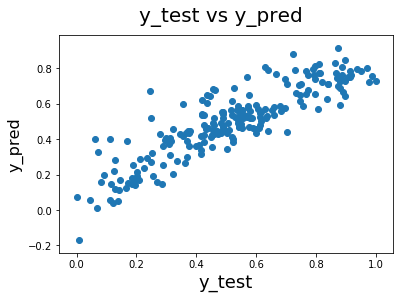

In [831]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

In [832]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7619638510963704